# Data Exploration

This notebook implements the following visualizations:
1. Male vs Femaile amounts, pieplot.
2. Amount of car categories, barplot.
3. Barplot on durations.
4. Seaborn pairplot.
5. Amount of finished contracts.

In [1]:
from typing import Any
from typing import List
from typing import Union
from typing import Tuple

import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
static_df: pd.DataFrame = pd.read_csv("raw_data/Static.csv", sep=";")
static_df.to_excel("raw_data/Static.xlsx")
repay_df: pd.DataFrame = pd.read_csv("raw_data/Repayments.csv", sep=";")
repay_df.to_excel("raw_data/Repayments.xlsx")
if not os.path.exists('images/exploration/'):
    os.makedirs('images/exploration/')

### Customers By Gender

Male Gender: 2655
Female Gender:  1137


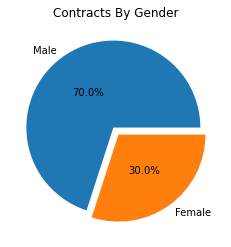

In [3]:
male_count: int = sum(static_df['GENDER'] == 'M')
female_count: int = sum(static_df['GENDER'] == 'F')
print("Male Gender:", male_count)
print("Female Gender: ", female_count)

gender_df: pd.DataFrame = pd.DataFrame()
gender_df['Type'] = ['Male', 'Female']
gender_df['Count'] = [male_count, female_count]

pie_out: Any = plt.pie(x=gender_df['Count'], labels=gender_df['Type'], autopct="%.1f%%", explode = [0.05] * 2, pctdistance=0.5)
plt.title("Contracts By Gender")
plt.savefig("images/exploration/gender-pie.png", dpi=300, bbox_inches='tight')

### Customers by Car Category

C:\Users\nekrald\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


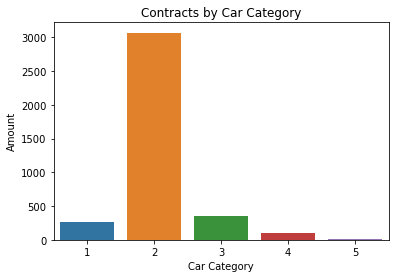

In [4]:
car_categories: pd.Series = static_df['CAR_CATEGORY']
count_info: Tuple[Union[np.array, List[int]], Union[np.array, List[int]]] = np.unique(car_categories, return_counts=True)
car_info_df: pd.DataFrame = pd.DataFrame()
car_info_df['Car Category'] = count_info[0]
car_info_df['Amount'] = count_info[1]
sns.barplot('Car Category', 'Amount', data=car_info_df)
plt.title("Contracts by Car Category")
plt.savefig("images/exploration/customers-by-car-category.png", dpi=300, bbox_inches='tight')

In [5]:
car_info_df.head()

,Car Category,Amount
0,1,260
1,2,3067
2,3,355
3,4,96
4,5,14


# Customers by Credit Duration

In [6]:
terms: pd.Series = static_df['TERM']
term_info: Tuple[Union[np.array, List[int]], Union[np.array, List[int]]] = np.unique(terms, return_counts=True)

C:\Users\nekrald\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


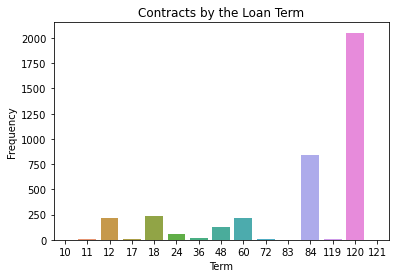

In [7]:
term_info_df: pd.DataFrame = pd.DataFrame()
term_info_df['Term'] = term_info[0]
term_info_df['Frequency'] = term_info[1]
sns.barplot('Term', 'Frequency', data=term_info_df)
plt.title("Contracts by the Loan Term")
plt.savefig("images/exploration/loan-term.png", dpi=300, bbox_inches='tight')

## Completed vs In-Progress Loans

Amount of completed contracts:  91
Amount of in-progress contracts:  3701
Total amount of contracts:  3792
Maximal length of a completed contract:  18


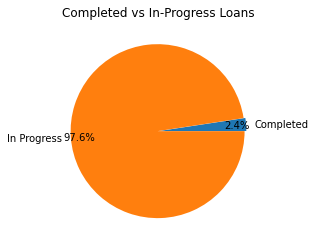

In [8]:
items: Union[np.array, List[str]] = np.unique(
    repay_df[np.isnan(repay_df['REPAYMENT_ACTUAL'])]['CONTRACT_ID'].values)

finished_contracts: pd.DataFrame = repay_df.loc[~repay_df['CONTRACT_ID'].isin(list(items))]
finished_ids: Union[np.array, List[str]] = np.unique(
    finished_contracts['CONTRACT_ID'])

print("Amount of completed contracts: ", len(finished_ids))
print("Amount of in-progress contracts: ", len(items))
print("Total amount of contracts: ", len(static_df['CONTRACT_ID']))
print("Maximal length of a completed contract: ", max(finished_contracts['PERIOD_ID']))

pie_progress: Any = plt.pie(x=[len(finished_ids), len(items)], labels=['Completed', 'In Progress'], autopct="%.1f%%", explode = [0.01] * 2, pctdistance=0.9)
plt.title("Completed vs In-Progress Loans")

plt.savefig("images/exploration/completed-vs-in-progress.png", dpi=300, bbox_inches='tight')

## Dataset Pairplot 

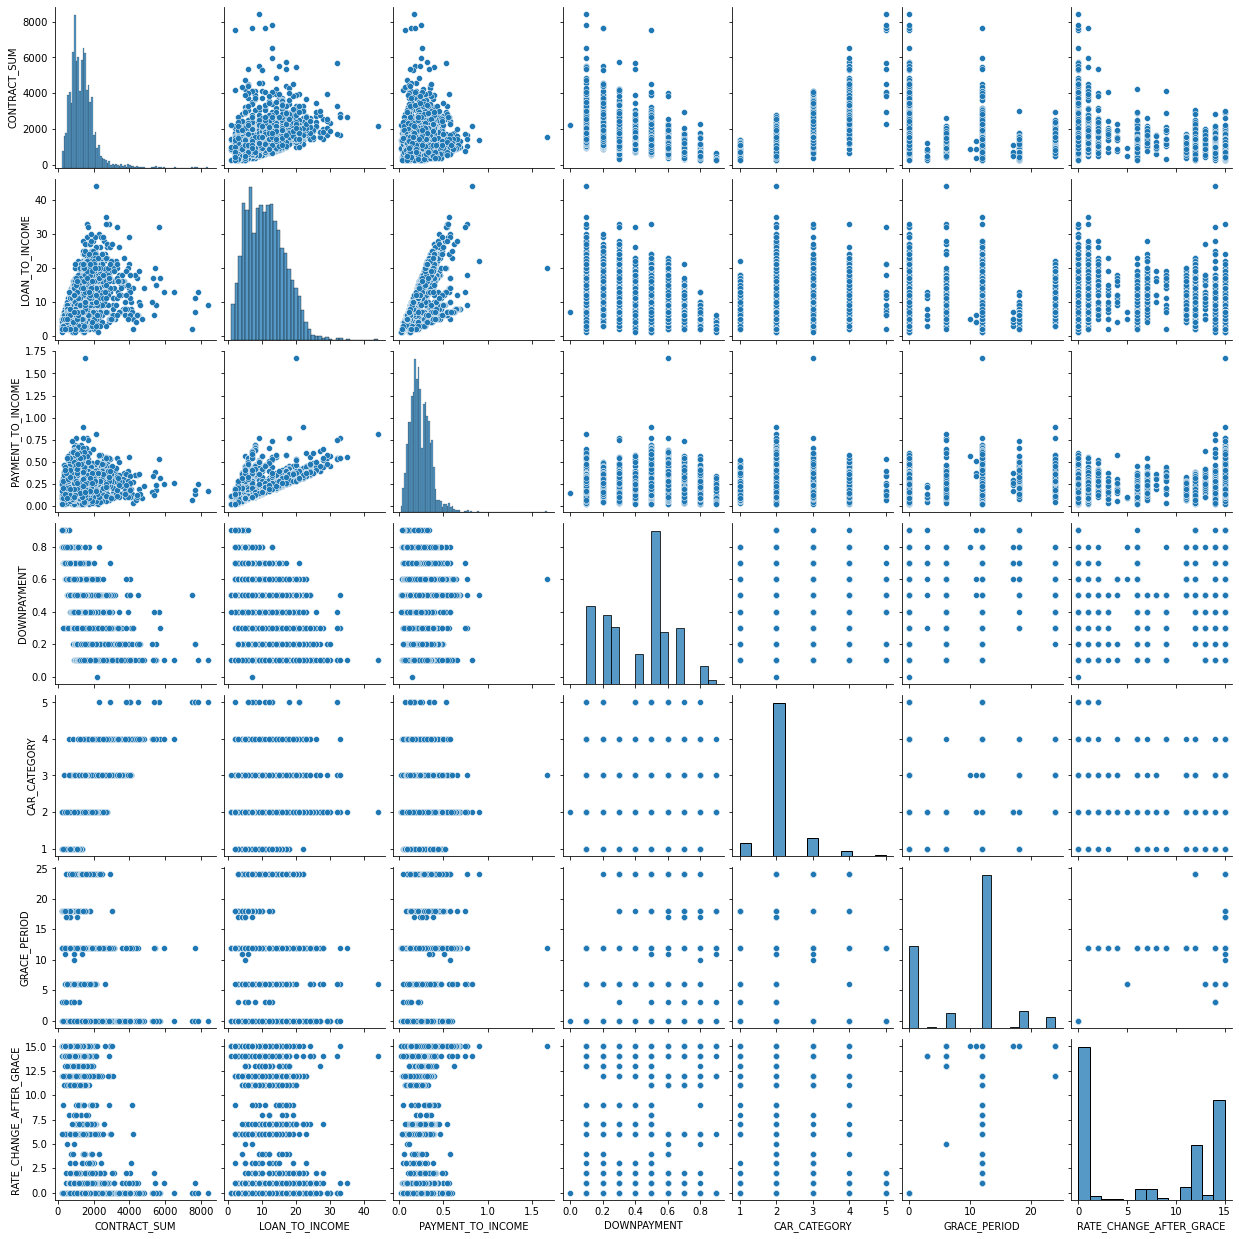

In [9]:
sns.pairplot(static_df.drop(['CONTRACT_ID', 'CLIENT_ID', 'TERM', 'GENDER', 'AGE'], axis=1))
plt.savefig("images/exploration/pairplot.png", dpi=300, bbox_inches='tight')